In [1]:
import vice
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plt

# Plot settings
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (4, 4),
    'font.family': 'STIXgeneral',
    'mathtext.fontset': 'cm',
    'legend.fontsize': 8,
})

## Standard Power-Law

In [2]:
output = vice.output('outputs/diffusion/insideout/powerlaw')

In [3]:
output.stars

vice.dataframe{
    formation_time -> [0, 0, 0, ... , 13.2, 13.2, 13.2]
    zone_origin ----> [0, 0, 0, ... , 199, 199, 199]
    zone_final -----> [17, 17, 33, ... , 199, 199, 199]
    mass -----------> [0, 0, 0, ... , 0, 0, 0]
    z(fe) ----------> [0, 0, 0, ... , 2.56095e+11, 2.56095e+11, 2.56095e+11]
    z(o) -----------> [0, 0, 0, ... , 1.29482e+12, 1.29482e+12, 1.29482e+12]
    [fe/h] ---------> [-inf, -inf, -inf, ... , 14.2978, 14.2978, 14.2978]
    [o/h] ----------> [-inf, -inf, -inf, ... , 14.3548, 14.3548, 14.3548]
    [o/fe] ---------> [nan, nan, nan, ... , 0.0570005, 0.0570005, 0.0570005]
    z --------------> [0, 0, 0, ... , 3.0974e+12, 3.0974e+12, 3.0974e+12]
    [m/h] ----------> [-inf, -inf, -inf, ... , 14.3449, 14.3449, 14.3449]
    age ------------> [13.2, 13.2, 13.2, ... , 0, 0, 0]
}

In [4]:
stars = pd.DataFrame(dict(output.stars))

In [5]:
stars

,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age
0,0.0,0.0,17.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
1,0.0,0.0,17.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
2,0.0,0.0,33.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
3,0.0,0.0,33.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
4,0.0,0.0,17.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2113595,13.2,199.0,199.0,0.0,2.560951e+11,1.294816e+12,14.297812,14.354812,0.057,3.097397e+12,14.344869,0.0
2113596,13.2,199.0,199.0,0.0,2.560951e+11,1.294816e+12,14.297812,14.354812,0.057,3.097397e+12,14.344869,0.0
2113597,13.2,199.0,199.0,0.0,2.560951e+11,1.294816e+12,14.297812,14.354812,0.057,3.097397e+12,14.344869,0.0
2113598,13.2,199.0,199.0,0.0,2.560951e+11,1.294816e+12,14.297812,14.354812,0.057,3.097397e+12,14.344869,0.0


In [6]:
analogdata = pd.read_csv('outputs/post-process/insideout/powerlaw_analogdata.out', sep='\t')
tmax = 13.2
analogdata = analogdata[analogdata['time_origin'] <= tmax]
analogdata

,# zone_origin,time_origin,analog_id,zfinal
0,0,0.0,26929792,0.16
1,0,0.0,26929314,1.70
2,0,0.0,26929590,1.54
3,0,0.0,26929590,1.54
4,0,0.0,26929792,0.16
...,...,...,...,...
2113595,199,13.2,35027429,-0.38
2113596,199,13.2,35027429,-0.38
2113597,199,13.2,35027429,-0.38
2113598,199,13.2,35027429,-0.38


In [7]:
stars[['analog_id', 'zfinal']] = analogdata[['analog_id', 'zfinal']]
stars

,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age,analog_id,zfinal
0,0.0,0.0,17.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26929792,0.16
1,0.0,0.0,17.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26929314,1.70
2,0.0,0.0,33.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26929590,1.54
3,0.0,0.0,33.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26929590,1.54
4,0.0,0.0,17.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26929792,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113595,13.2,199.0,199.0,0.0,2.560951e+11,1.294816e+12,14.297812,14.354812,0.057,3.097397e+12,14.344869,0.0,35027429,-0.38
2113596,13.2,199.0,199.0,0.0,2.560951e+11,1.294816e+12,14.297812,14.354812,0.057,3.097397e+12,14.344869,0.0,35027429,-0.38
2113597,13.2,199.0,199.0,0.0,2.560951e+11,1.294816e+12,14.297812,14.354812,0.057,3.097397e+12,14.344869,0.0,35027429,-0.38
2113598,13.2,199.0,199.0,0.0,2.560951e+11,1.294816e+12,14.297812,14.354812,0.057,3.097397e+12,14.344869,0.0,35027429,-0.38


In [8]:
stars = stars[stars['mass'] > 0]
stars

,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age,analog_id,zfinal
1600,0.01,0.0,52.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26926505,1.42
1601,0.01,0.0,33.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26926824,-0.91
1602,0.01,0.0,17.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26929590,1.54
1603,0.01,0.0,22.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26929590,1.54
1604,0.01,0.0,33.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26926724,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113235,13.20,154.0,154.0,3698.4550,0.000224,0.001364,-0.761097,-0.622726,0.138371,0.003170,-0.645098,0.00,35031464,-0.13
2113236,13.20,154.0,154.0,3698.4550,0.000224,0.001364,-0.761097,-0.622726,0.138371,0.003170,-0.645098,0.00,35025388,-0.33
2113237,13.20,154.0,154.0,3698.4550,0.000224,0.001364,-0.761097,-0.622726,0.138371,0.003170,-0.645098,0.00,34979585,-0.22
2113238,13.20,154.0,154.0,3698.4550,0.000224,0.001364,-0.761097,-0.622726,0.138371,0.003170,-0.645098,0.00,35025551,-0.31


In [9]:
# Select a subset of stars within the given radius and z-height bounds
zone_width = 0.1
galr_min = 7
galr_max = 9
absz_min = 0
absz_max = 0.5

zone_min = galr_min / zone_width
zone_max = galr_max / zone_width

subset = stars[(stars['zone_final'] >= zone_min) & 
               (stars['zone_final'] < zone_max) & 
               (stars['zfinal'] >= absz_min) &
               (stars['zfinal'] < absz_max)]
subset.reset_index(inplace=True)
subset

,index,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age,analog_id,zfinal
0,6629,0.04,28.0,84.0,7191.054,0.000009,0.000112,-2.159889,-1.709785,0.450104,0.000241,-1.764683,13.16,26926527,0.34
1,26624,0.16,128.0,70.0,1070.532,0.000004,0.000039,-2.566260,-2.167230,0.399030,0.000085,-2.218132,13.04,27062403,0.19
2,26625,0.16,128.0,70.0,1070.532,0.000004,0.000039,-2.566260,-2.167230,0.399030,0.000085,-2.218132,13.04,27062403,0.19
3,26626,0.16,128.0,70.0,1070.532,0.000004,0.000039,-2.566260,-2.167230,0.399030,0.000085,-2.218132,13.04,27062403,0.19
4,26627,0.16,128.0,70.0,1070.532,0.000004,0.000039,-2.566260,-2.167230,0.399030,0.000085,-2.218132,13.04,27062403,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60657,2112715,13.20,89.0,89.0,25526.080,0.001088,0.004682,-0.074063,-0.086946,-0.012883,0.011523,-0.084546,0.00,35013532,0.17
60658,2112716,13.20,89.0,89.0,25526.080,0.001088,0.004682,-0.074063,-0.086946,-0.012883,0.011523,-0.084546,0.00,35025202,0.33
60659,2112717,13.20,89.0,89.0,25526.080,0.001088,0.004682,-0.074063,-0.086946,-0.012883,0.011523,-0.084546,0.00,34981571,0.22
60660,2112718,13.20,89.0,89.0,25526.080,0.001088,0.004682,-0.074063,-0.086946,-0.012883,0.011523,-0.084546,0.00,34982598,0.02


In [10]:
# Randomly sample from the above 
rng = default_rng()
rand_indices = rng.choice(subset.index, size=10000, replace=False)
sample = subset.loc[rand_indices]
sample

,index,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age,analog_id,zfinal
6483,787608,4.92,51.0,80.0,111960.20,0.001687,0.008544,0.116485,0.174283,0.057798,0.020433,0.164208,8.28,31771674,0.20
627,224550,1.40,68.0,74.0,51112.52,0.000597,0.004165,-0.334920,-0.137808,0.197112,0.009509,-0.167990,11.80,27876392,0.03
34807,1605286,10.03,60.0,73.0,61989.16,0.001826,0.008136,0.150820,0.152990,0.002169,0.019894,0.152591,3.17,34278660,0.04
39781,1715784,10.72,73.0,84.0,44391.94,0.001413,0.006244,0.039501,0.038086,-0.001415,0.015292,0.038347,2.48,34436027,0.02
278,94467,0.59,8.0,76.0,69591.65,0.000620,0.004917,-0.318171,-0.065655,0.252516,0.011059,-0.102404,12.61,27141787,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,272513,1.70,64.0,70.0,64883.42,0.000746,0.005256,-0.237979,-0.036743,0.201235,0.011986,-0.067440,11.50,27876392,0.03
43396,1790980,11.19,72.0,82.0,44083.73,0.001457,0.006387,0.052887,0.047899,-0.004989,0.015666,0.048821,2.01,34497809,0.42
34823,1605399,10.03,74.0,78.0,45345.92,0.001386,0.006115,0.031253,0.029006,-0.002248,0.014981,0.029420,3.17,34277491,0.12
39910,1718884,10.74,60.0,84.0,58375.82,0.001855,0.008197,0.157764,0.156279,-0.001485,0.020076,0.156553,2.46,34502940,0.40


In [11]:
# Get ISM tracks for mean galr in post-processing
post_process = vice.output('outputs/post-process/insideout/powerlaw')
hist = post_process.zones['zone%i' % int((galr_min + galr_max)/(2 * zone_width))].history
hist

vice.dataframe{
    time -----------> [0, 0.01, 0.02, ... , 13.19, 13.2, 13.21]
    mgas -----------> [1e-12, 1.22571e+07, 1.84292e+07, ... , 8.44513e+07, 8.4444e+07, 8.44367e+07]
    mstar ----------> [0, 0, 2744.13, ... , 2.54687e+08, 2.54823e+08, 2.54959e+08]
    sfr ------------> [0, 0.000303477, 0.000605042, ... , 0.0255115, 0.0254949, 0.0254783]
    ifr ------------> [nan, 1.22667, 0.619101, ... , 0.0682415, 0.0681945, 0.0681474]
    ofr ------------> [1.38831e-316, 0.000658962, 0.00131377, ... , 0.055395, 0.0553589, 0.0553228]
    eta_0 ----------> [2.17137, 2.17137, 2.17137, ... , 2.17137, 2.17137, 2.17137]
    r_eff ----------> [nan, 0.0957713, 0.120178, ... , 0.467608, 0.467669, 0.46773]
    z_in(fe) -------> [0, 0, 0, ... , 0, 0, 0]
    z_in(o) --------> [0, 0, 0, ... , 0, 0, 0]
    z_out(fe) ------> [0.5, 2.96878e-07, 5.90807e-07, ... , 0.00126791, 0.00126814, 0.00126837]
    z_out(o) -------> [0.5, 3.71098e-06, 7.38509e-06, ... , 0.00549036, 0.00549059, 0.00549082]
    mas

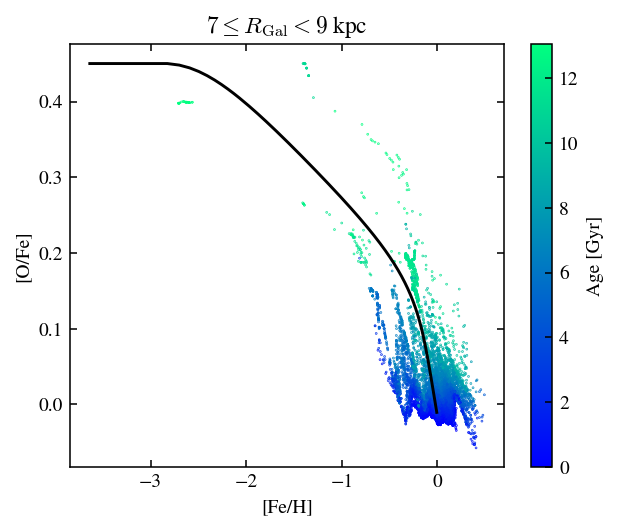

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))
pc = ax.scatter(sample['[fe/h]'], sample['[o/fe]'], s=0.1, c=sample['age'], cmap='winter')
ax.plot(hist['[fe/h]'], hist['[o/fe]'], c='k')
cbar = plt.colorbar(pc)
cbar.set_label('Age [Gyr]')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_title(r'$7\leq R_{\rm{Gal}} < 9$ kpc')
plt.show()

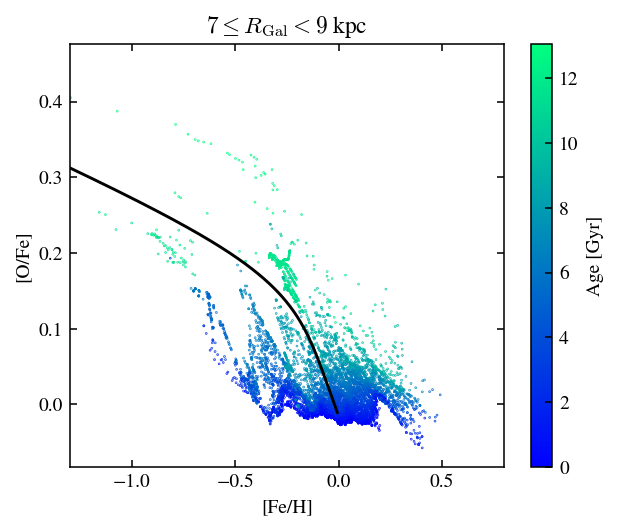

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))
pc = ax.scatter(sample['[fe/h]'], sample['[o/fe]'], s=0.1, c=sample['age'], cmap='winter')
ax.plot(hist['[fe/h]'], hist['[o/fe]'], c='k')
cbar = plt.colorbar(pc)
cbar.set_label('Age [Gyr]')
ax.set_xlim((-1.3, 0.8))
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_title(r'$7\leq R_{\rm{Gal}} < 9$ kpc')
plt.show()

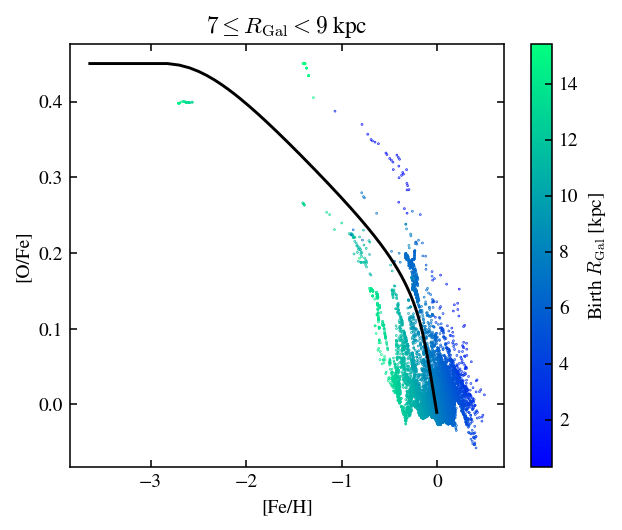

In [14]:
fig, ax = plt.subplots(figsize=(5, 4))
pc = ax.scatter(sample['[fe/h]'], sample['[o/fe]'], s=0.1, c=sample['zone_origin'] * zone_width, cmap='winter')
ax.plot(hist['[fe/h]'], hist['[o/fe]'], c='k')
cbar = plt.colorbar(pc)
cbar.set_label(r'Birth $R_{\rm{Gal}}$ [kpc]')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_title(r'$7\leq R_{\rm{Gal}} < 9$ kpc')
plt.show()

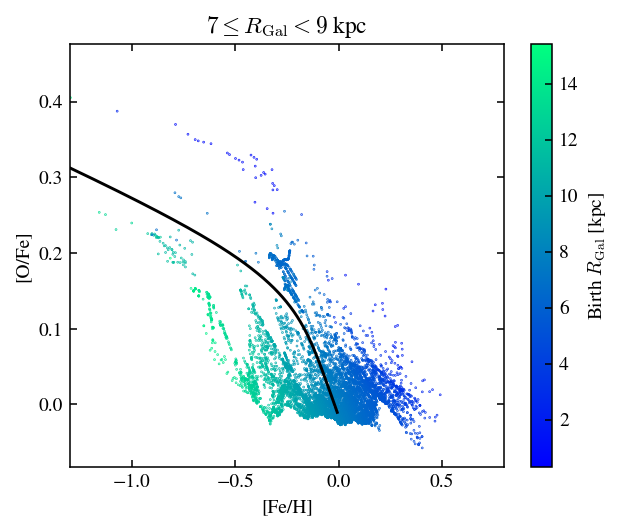

In [15]:
fig, ax = plt.subplots(figsize=(5, 4))
pc = ax.scatter(sample['[fe/h]'], sample['[o/fe]'], s=0.1, c=sample['zone_origin'] * zone_width, cmap='winter')
ax.plot(hist['[fe/h]'], hist['[o/fe]'], c='k')
cbar = plt.colorbar(pc)
cbar.set_label(r'Birth $R_{\rm{Gal}}$ [kpc]')
ax.set_xlim((-1.3, 0.8))
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_title(r'$7\leq R_{\rm{Gal}} < 9$ kpc')
plt.show()

## Steep Power-Law

In [16]:
output = vice.output('outputs/diffusion/insideout/powerlaw_steep')

In [17]:
output.stars

vice.dataframe{
    formation_time -> [0, 0, 0, ... , 13.2, 13.2, 13.2]
    zone_origin ----> [0, 0, 0, ... , 199, 199, 199]
    zone_final -----> [18, 18, 33, ... , 199, 199, 199]
    mass -----------> [0, 0, 0, ... , 0, 0, 0]
    z(fe) ----------> [0, 0, 0, ... , 2.62666e+11, 2.62666e+11, 2.62666e+11]
    z(o) -----------> [0, 0, 0, ... , 1.23912e+12, 1.23912e+12, 1.23912e+12]
    [fe/h] ---------> [-inf, -inf, -inf, ... , 14.3088, 14.3088, 14.3088]
    [o/h] ----------> [-inf, -inf, -inf, ... , 14.3357, 14.3357, 14.3357]
    [o/fe] ---------> [nan, nan, nan, ... , 0.0269048, 0.0269048, 0.0269048]
    z --------------> [0, 0, 0, ... , 2.9993e+12, 2.9993e+12, 2.9993e+12]
    [m/h] ----------> [-inf, -inf, -inf, ... , 14.3309, 14.3309, 14.3309]
    age ------------> [13.2, 13.2, 13.2, ... , 0, 0, 0]
}

In [18]:
stars = pd.DataFrame(dict(output.stars))

In [19]:
stars

,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age
0,0.0,0.0,18.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
1,0.0,0.0,18.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
2,0.0,0.0,33.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
3,0.0,0.0,18.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
4,0.0,0.0,18.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2113595,13.2,199.0,199.0,0.0,2.626659e+11,1.239124e+12,14.308814,14.335719,0.026905,2.999295e+12,14.330891,0.0
2113596,13.2,199.0,199.0,0.0,2.626659e+11,1.239124e+12,14.308814,14.335719,0.026905,2.999295e+12,14.330891,0.0
2113597,13.2,199.0,199.0,0.0,2.626659e+11,1.239124e+12,14.308814,14.335719,0.026905,2.999295e+12,14.330891,0.0
2113598,13.2,199.0,199.0,0.0,2.626659e+11,1.239124e+12,14.308814,14.335719,0.026905,2.999295e+12,14.330891,0.0


In [20]:
analogdata = pd.read_csv('outputs/post-process/insideout/powerlaw_steep_analogdata.out', sep='\t')
tmax = 13.2
analogdata = analogdata[analogdata['time_origin'] <= tmax]
analogdata

,# zone_origin,time_origin,analog_id,zfinal
0,0,0.0,26926678,0.19
1,0,0.0,26926858,2.74
2,0,0.0,26925158,-1.76
3,0,0.0,26926678,0.19
4,0,0.0,26926858,2.74
...,...,...,...,...
2113595,199,13.2,35013371,-1.14
2113596,199,13.2,35013371,-1.14
2113597,199,13.2,35013371,-1.14
2113598,199,13.2,35013371,-1.14


In [21]:
stars[['analog_id', 'zfinal']] = analogdata[['analog_id', 'zfinal']]
stars

,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age,analog_id,zfinal
0,0.0,0.0,18.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26926678,0.19
1,0.0,0.0,18.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26926858,2.74
2,0.0,0.0,33.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26925158,-1.76
3,0.0,0.0,18.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26926678,0.19
4,0.0,0.0,18.0,0.0,0.000000e+00,0.000000e+00,-inf,-inf,NaN,0.000000e+00,-inf,13.2,26926858,2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113595,13.2,199.0,199.0,0.0,2.626659e+11,1.239124e+12,14.308814,14.335719,0.026905,2.999295e+12,14.330891,0.0,35013371,-1.14
2113596,13.2,199.0,199.0,0.0,2.626659e+11,1.239124e+12,14.308814,14.335719,0.026905,2.999295e+12,14.330891,0.0,35013371,-1.14
2113597,13.2,199.0,199.0,0.0,2.626659e+11,1.239124e+12,14.308814,14.335719,0.026905,2.999295e+12,14.330891,0.0,35013371,-1.14
2113598,13.2,199.0,199.0,0.0,2.626659e+11,1.239124e+12,14.308814,14.335719,0.026905,2.999295e+12,14.330891,0.0,35013371,-1.14


In [22]:
stars = stars[stars['mass'] > 0]
stars

,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age,analog_id,zfinal
1600,0.01,0.0,39.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26928892,-1.73
1601,0.01,0.0,33.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26928461,-0.43
1602,0.01,0.0,18.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26928892,-1.73
1603,0.01,0.0,18.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26928892,-1.73
1604,0.01,0.0,30.0,125.7098,0.000004,0.000045,-2.557639,-2.107535,0.450104,0.000096,-2.162433,13.19,26925158,-1.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113235,13.20,154.0,154.0,3698.4550,0.000227,0.001365,-0.753883,-0.622380,0.131503,0.003179,-0.643778,0.00,34969488,0.13
2113236,13.20,154.0,154.0,3698.4550,0.000227,0.001365,-0.753883,-0.622380,0.131503,0.003179,-0.643778,0.00,34966927,-0.39
2113237,13.20,154.0,154.0,3698.4550,0.000227,0.001365,-0.753883,-0.622380,0.131503,0.003179,-0.643778,0.00,34966927,-0.39
2113238,13.20,154.0,154.0,3698.4550,0.000227,0.001365,-0.753883,-0.622380,0.131503,0.003179,-0.643778,0.00,34972282,0.55


In [23]:
# Select a subset of stars within the given radius and z-height bounds
zone_width = 0.1
galr_min = 7
galr_max = 9
absz_min = 0
absz_max = 0.5

zone_min = galr_min / zone_width
zone_max = galr_max / zone_width

subset = stars[(stars['zone_final'] >= zone_min) & 
               (stars['zone_final'] < zone_max) & 
               (stars['zfinal'] >= absz_min) &
               (stars['zfinal'] < absz_max)]
subset.reset_index(inplace=True)
subset

,index,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age,analog_id,zfinal
0,2448,0.01,106.0,70.0,153.9873,1.825234e-07,0.000002,-3.849271,-3.399167,0.450104,0.000005,-3.454066,13.19,26957022,0.00
1,2449,0.01,106.0,70.0,153.9873,1.825234e-07,0.000002,-3.849271,-3.399167,0.450104,0.000005,-3.454066,13.19,26957022,0.00
2,2450,0.01,106.0,70.0,153.9873,1.825234e-07,0.000002,-3.849271,-3.399167,0.450104,0.000005,-3.454066,13.19,26957022,0.00
3,2451,0.01,106.0,70.0,153.9873,1.825234e-07,0.000002,-3.849271,-3.399167,0.450104,0.000005,-3.454066,13.19,26957022,0.00
4,2452,0.01,106.0,70.0,153.9873,1.825234e-07,0.000002,-3.849271,-3.399167,0.450104,0.000005,-3.454066,13.19,26957022,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74707,2112711,13.20,88.0,88.0,26194.5200,1.092801e-03,0.004771,-0.072049,-0.078765,-0.006717,0.011711,-0.077521,0.00,35011845,0.10
74708,2112714,13.20,89.0,89.0,25526.0800,1.054392e-03,0.004674,-0.087588,-0.087669,-0.000081,0.011441,-0.087654,0.00,35009816,0.01
74709,2112715,13.20,89.0,89.0,25526.0800,1.054392e-03,0.004674,-0.087588,-0.087669,-0.000081,0.011441,-0.087654,0.00,34998548,0.07
74710,2112717,13.20,89.0,89.0,25526.0800,1.054392e-03,0.004674,-0.087588,-0.087669,-0.000081,0.011441,-0.087654,0.00,34975537,0.11


In [24]:
# Randomly sample from the above 
rng = default_rng()
rand_indices = rng.choice(subset.index, size=10000, replace=False, p=subset['mass']/subset['mass'].sum())
sample = subset.loc[rand_indices]
sample

,index,formation_time,zone_origin,zone_final,mass,z(fe),z(o),[fe/h],[o/h],[o/fe],z,[m/h],age,analog_id,zfinal
67186,1979716,12.37,64.0,76.0,47679.61,0.001799,0.007564,0.144540,0.121367,-0.023173,0.018700,0.125725,0.83,34806922,0.07
51303,1654952,10.34,69.0,76.0,50456.46,0.001561,0.006737,0.082864,0.071080,-0.011784,0.016573,0.073272,2.86,34293577,0.05
19808,825925,5.16,40.0,70.0,139374.60,0.002375,0.010607,0.265072,0.268200,0.003128,0.025927,0.267626,8.04,31878103,0.36
15911,649806,4.06,25.0,76.0,184701.90,0.002718,0.012636,0.323714,0.344209,0.020495,0.030665,0.340509,9.14,30852918,0.22
15235,568243,3.55,30.0,70.0,180372.70,0.002446,0.011130,0.277908,0.289110,0.011203,0.027114,0.287070,9.65,30554190,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73844,2099738,13.12,67.0,74.0,42756.12,0.001668,0.007118,0.111487,0.094961,-0.016526,0.017546,0.098050,0.08,35018456,0.05
50378,1632584,10.20,73.0,82.0,46020.43,0.001420,0.006220,0.041550,0.036399,-0.005151,0.015257,0.037352,3.00,34273521,0.40
58993,1819803,11.37,75.0,77.0,40336.63,0.001414,0.006060,0.039774,0.025107,-0.014667,0.014927,0.027843,1.83,34570756,0.29
22208,919359,5.74,119.0,76.0,14407.99,0.000496,0.002474,-0.415362,-0.364070,0.051291,0.005930,-0.373066,7.46,32773424,0.32


In [25]:
# Get ISM tracks for mean galr in post-processing
post_process = vice.output('outputs/post-process/insideout/powerlaw_steep')
hist = post_process.zones['zone%i' % int((galr_min + galr_max)/(2 * zone_width))].history
hist

vice.dataframe{
    time -----------> [0, 0.01, 0.02, ... , 13.19, 13.2, 13.21]
    mgas -----------> [1e-12, 1.22571e+07, 1.84292e+07, ... , 8.44513e+07, 8.4444e+07, 8.44367e+07]
    mstar ----------> [0, 0, 2744.13, ... , 2.54687e+08, 2.54823e+08, 2.54959e+08]
    sfr ------------> [0, 0.000303477, 0.000605042, ... , 0.0255115, 0.0254949, 0.0254783]
    ifr ------------> [nan, 1.22667, 0.619101, ... , 0.0682415, 0.0681945, 0.0681474]
    ofr ------------> [1.38369e-316, 0.000658962, 0.00131377, ... , 0.055395, 0.0553589, 0.0553228]
    eta_0 ----------> [2.17137, 2.17137, 2.17137, ... , 2.17137, 2.17137, 2.17137]
    r_eff ----------> [nan, 0.0957713, 0.120178, ... , 0.467608, 0.467669, 0.46773]
    z_in(fe) -------> [0, 0, 0, ... , 0, 0, 0]
    z_in(o) --------> [0, 0, 0, ... , 0, 0, 0]
    z_out(fe) ------> [0.499999, 2.96878e-07, 5.90807e-07, ... , 0.0012553, 0.00125542, 0.00125554]
    z_out(o) -------> [0.500001, 3.71098e-06, 7.38509e-06, ... , 0.00549033, 0.00549056, 0.00549079

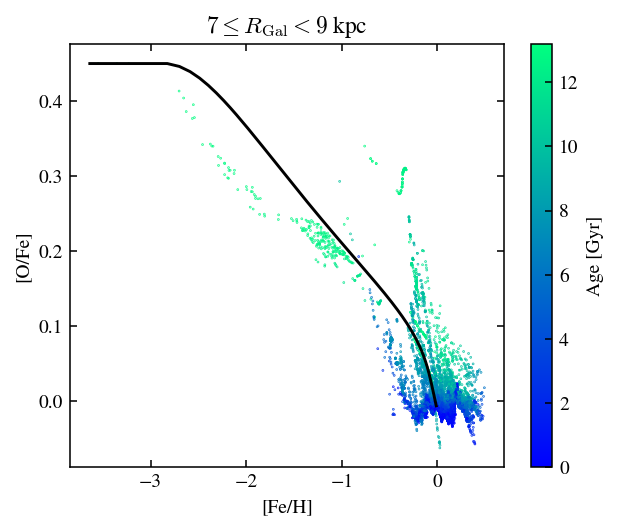

In [26]:
fig, ax = plt.subplots(figsize=(5, 4))
pc = ax.scatter(sample['[fe/h]'], sample['[o/fe]'], s=0.1, c=sample['age'], cmap='winter')
ax.plot(hist['[fe/h]'], hist['[o/fe]'], c='k')
cbar = plt.colorbar(pc)
cbar.set_label('Age [Gyr]')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_title(r'$7\leq R_{\rm{Gal}} < 9$ kpc')
plt.show()

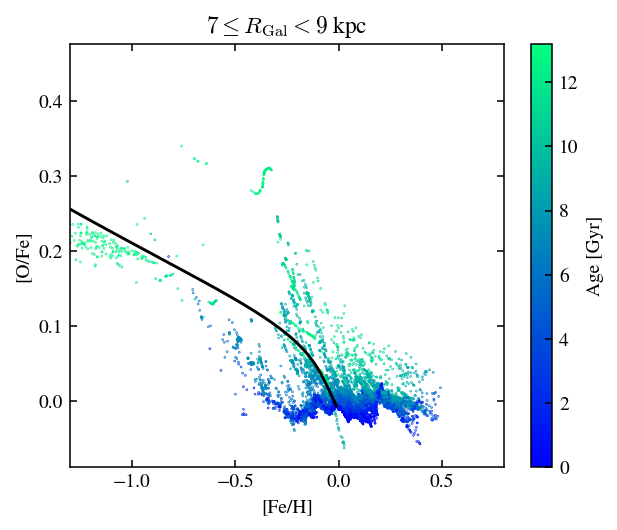

In [27]:
fig, ax = plt.subplots(figsize=(5, 4))
pc = ax.scatter(sample['[fe/h]'], sample['[o/fe]'], s=0.1, c=sample['age'], cmap='winter')
ax.plot(hist['[fe/h]'], hist['[o/fe]'], c='k')
cbar = plt.colorbar(pc)
cbar.set_label('Age [Gyr]')
ax.set_xlim((-1.3, 0.8))
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_title(r'$7\leq R_{\rm{Gal}} < 9$ kpc')
plt.show()

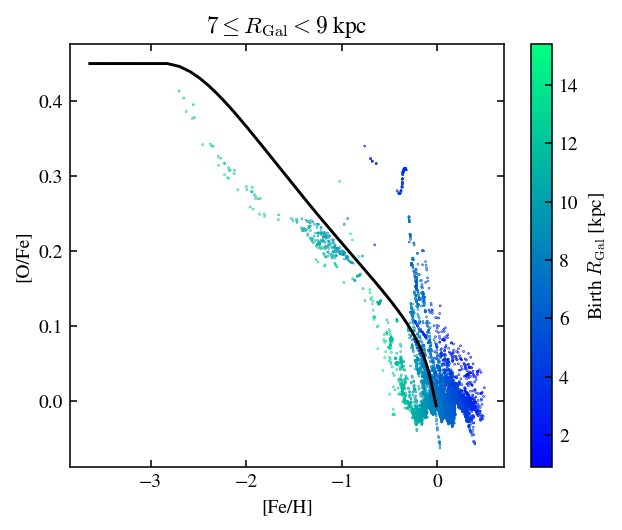

In [28]:
fig, ax = plt.subplots(figsize=(5, 4))
pc = ax.scatter(sample['[fe/h]'], sample['[o/fe]'], s=0.1, c=sample['zone_origin'] * zone_width, cmap='winter')
ax.plot(hist['[fe/h]'], hist['[o/fe]'], c='k')
cbar = plt.colorbar(pc)
cbar.set_label(r'Birth $R_{\rm{Gal}}$ [kpc]')
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_title(r'$7\leq R_{\rm{Gal}} < 9$ kpc')
plt.show()

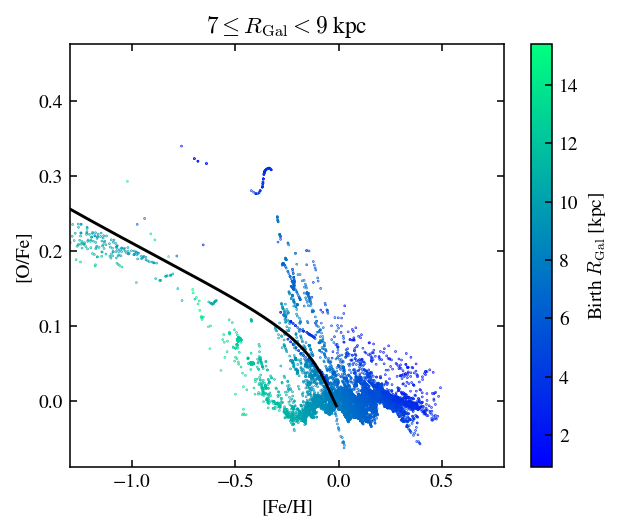

In [29]:
fig, ax = plt.subplots(figsize=(5, 4))
pc = ax.scatter(sample['[fe/h]'], sample['[o/fe]'], s=0.1, c=sample['zone_origin'] * zone_width, cmap='winter')
ax.plot(hist['[fe/h]'], hist['[o/fe]'], c='k')
cbar = plt.colorbar(pc)
cbar.set_label(r'Birth $R_{\rm{Gal}}$ [kpc]')
ax.set_xlim((-1.3, 0.8))
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')
ax.set_title(r'$7\leq R_{\rm{Gal}} < 9$ kpc')
plt.show()